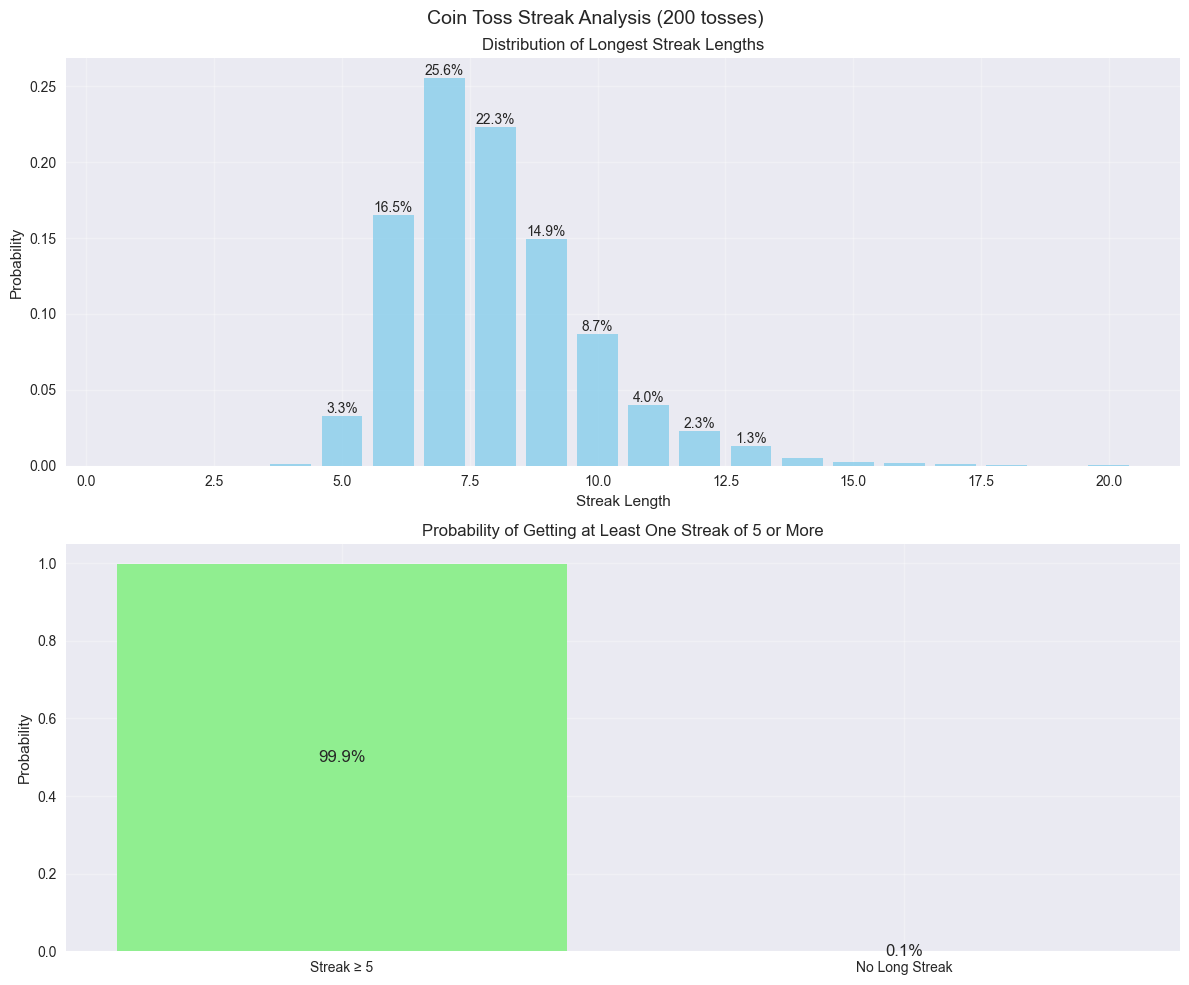


Numerical Results:
Probability of at least one streak of 5 or more: 0.999

Distribution of longest streak lengths:
Length 5: 0.033 (3.3%)
Length 6: 0.165 (16.5%)
Length 7: 0.256 (25.6%)
Length 8: 0.223 (22.3%)
Length 9: 0.149 (14.9%)
Length 10: 0.087 (8.7%)
Length 11: 0.040 (4.0%)
Length 12: 0.023 (2.3%)
Length 13: 0.013 (1.3%)
Length 14: 0.005 (0.5%)
Length 15: 0.002 (0.2%)
Length 16: 0.002 (0.2%)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_streaks(n_tosses=200, n_simulations=10000):
    # Set random seed for reproducibility
    np.random.seed(42)
    
    # Generate all tosses for all simulations at once
    tosses = np.random.choice([0, 1], size=(n_simulations, n_tosses))
    
    # Arrays to store results
    longest_streaks = np.zeros(n_simulations)
    has_streak_5plus = np.zeros(n_simulations)
    
    # Analyze each simulation
    for i in range(n_simulations):
        # Find streaks
        current_streak = 1
        max_streak = 1
        streak_5plus_found = False
        
        for j in range(1, n_tosses):
            if tosses[i, j] == tosses[i, j-1]:
                current_streak += 1
                if current_streak > max_streak:
                    max_streak = current_streak
                if current_streak >= 5:
                    streak_5plus_found = True
            else:
                current_streak = 1
        
        longest_streaks[i] = max_streak
        has_streak_5plus[i] = streak_5plus_found
    
    # Calculate probabilities
    prob_streak_5plus = np.mean(has_streak_5plus)
    streak_distribution = np.bincount(longest_streaks.astype(int))[1:] / n_simulations
    
    return prob_streak_5plus, streak_distribution

def plot_results(prob_streak_5plus, streak_distribution):
    plt.style.use('seaborn-v0_8')
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    fig.suptitle('Coin Toss Streak Analysis (200 tosses)', fontsize=14)
    
    # Plot 1: Streak Length Distribution
    x = np.arange(1, len(streak_distribution) + 1)
    ax1.bar(x, streak_distribution, alpha=0.8, color='skyblue')
    ax1.set_xlabel('Streak Length')
    ax1.set_ylabel('Probability')
    ax1.set_title('Distribution of Longest Streak Lengths')
    ax1.grid(True, alpha=0.3)
    
    # Add percentage labels on top of bars
    for i, v in enumerate(streak_distribution):
        if v > 0.01:  # Only show labels for probabilities > 1%
            ax1.text(i + 1, v, f'{v*100:.1f}%', ha='center', va='bottom')
    
    # Plot 2: Probability visualization
    ax2.bar(['Streak ≥ 5', 'No Long Streak'], 
            [prob_streak_5plus, 1-prob_streak_5plus],
            color=['lightgreen', 'lightcoral'])
    ax2.set_ylabel('Probability')
    ax2.set_title('Probability of Getting at Least One Streak of 5 or More')
    ax2.grid(True, alpha=0.3)
    
    # Add percentage labels
    ax2.text(0, prob_streak_5plus/2, f'{prob_streak_5plus*100:.1f}%', 
             ha='center', va='center', fontsize=12)
    ax2.text(1, (1-prob_streak_5plus)/2, f'{(1-prob_streak_5plus)*100:.1f}%', 
             ha='center', va='center', fontsize=12)
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()
    
    # Print numerical results
    print(f"\nNumerical Results:")
    print(f"Probability of at least one streak of 5 or more: {prob_streak_5plus:.3f}")
    print("\nDistribution of longest streak lengths:")
    for length, prob in enumerate(streak_distribution, 1):
        if prob > 0.001:  # Only show non-negligible probabilities
            print(f"Length {length}: {prob:.3f} ({prob*100:.1f}%)")

# Run the analysis
n_tosses=200 
n_simulations=10000
prob_streak_5plus, streak_distribution = analyze_streaks(n_tosses, n_simulations)
plot_results(prob_streak_5plus, streak_distribution)

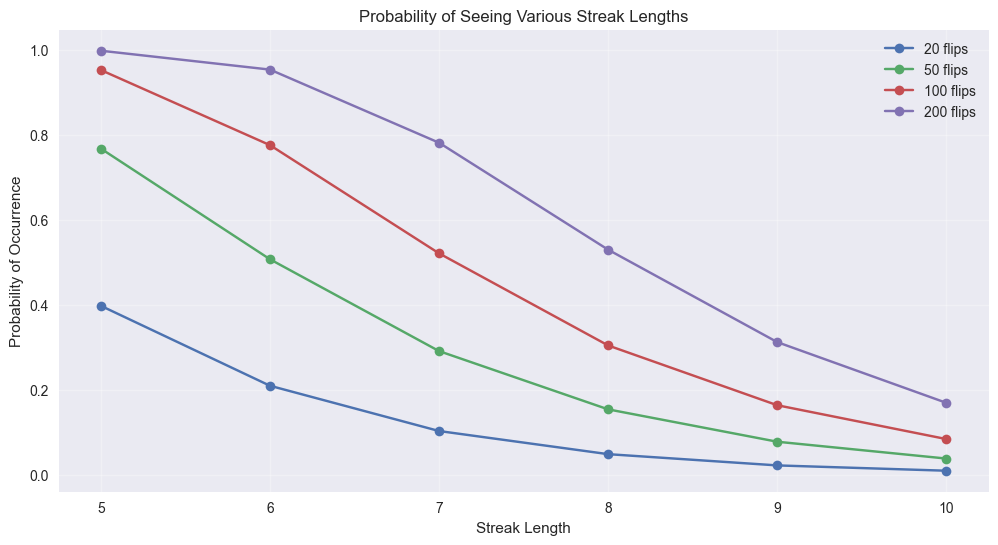

In [16]:
def probability_calculator(streak_length, n_trials):
    """Calculate probability of seeing a streak in n trials"""
    single_probability = (1/2) ** streak_length
    at_least_one = 1 - (1 - single_probability) ** (n_trials - streak_length + 1)
    return at_least_one

# Create interactive visualization
streak_lengths = range(5, 11)
trials = [20, 50, 100, 200]

plt.figure(figsize=(12, 6))
for n in trials:
    probs = [probability_calculator(k, n) for k in streak_lengths]
    plt.plot(streak_lengths, probs, label=f'{n} flips', marker='o')

plt.xlabel('Streak Length')
plt.ylabel('Probability of Occurrence')
plt.title('Probability of Seeing Various Streak Lengths')
plt.legend()
plt.grid(True, alpha=0.3)



In [6]:
import numpy as np

# Transition matrix
P = np.array([[0.7, 0.3],  # Sunny -> [Sunny, Rainy]
              [0.4, 0.6]]) # Rainy -> [Sunny, Rainy]

# Initial state (Sunny)
state = np.array([1, 0])

# Evolution over 3 days
for day in range(4):
    state = state @ P # matrix multiplication 
    print(f"Day {day+1}: P(Sunny)={state[0]:.3f}, P(Rainy)={state[1]:.3f}")

Day 1: P(Sunny)=0.700, P(Rainy)=0.300
Day 2: P(Sunny)=0.610, P(Rainy)=0.390
Day 3: P(Sunny)=0.583, P(Rainy)=0.417
Day 4: P(Sunny)=0.575, P(Rainy)=0.425


In [15]:
def n_step_transition(P, n):
    """
    Calculate n-step transition probabilities

    Args:
    P: transition matrix
    n: number of steps

    Returns:
    P^n: n-step transition matrix
    """
    return np.linalg.matrix_power(P, n)

# Example usage
P = np.array([[0.7, 0.3],
              [0.4, 0.6]])

n = 3

P_n = n_step_transition(P, n)
print(f"{n}-step transition probabilities:\n{P_n}")

3-step transition probabilities:
[[0.583 0.417]
 [0.556 0.444]]


In [17]:
P = np.array([[0.7, 0.3],
              [0.4, 0.6]])

# Let's simulate what happens over many steps
initial_state = np.array([1, 0])  # Start in state 0 with probability 1

print("Starting evolution:")
current_state = initial_state
for step in range(10):
    current_state = current_state @ P
    print(f"Step {step+1}: [{current_state[0]:.4f}, {current_state[1]:.4f}]")

Starting evolution:
Step 1: [0.7000, 0.3000]
Step 2: [0.6100, 0.3900]
Step 3: [0.5830, 0.4170]
Step 4: [0.5749, 0.4251]
Step 5: [0.5725, 0.4275]
Step 6: [0.5717, 0.4283]
Step 7: [0.5715, 0.4285]
Step 8: [0.5715, 0.4285]
Step 9: [0.5714, 0.4286]
Step 10: [0.5714, 0.4286]


In [18]:
import numpy as np

def random_walk_step(current_position, step):
    """
    f(Y_n, X_{n+1}) for random walk
    current_position: Y_n
    step: X_{n+1} (±1 with equal probability)
    """
    return current_position + step

# Simulate 10 steps
Y = [0]  # Start at 0
for n in range(10):
    # Generate independent X_{n+1}
    X_next = np.random.choice([-1, 1])
    # Apply f to get next state
    Y_next = random_walk_step(Y[-1], X_next)
    Y.append(Y_next)

print("Random walk path:", Y)

Random walk path: [0, 1, 2, 1, 0, 1, 0, 1, 0, -1, -2]
